# Setup COLAB

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Updating fastai...
Done.


In [0]:
# Used to reference the root directory, for directory traversal
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
mount_dir = '/content/gdrive'
root_dir = '/content/gdrive/My Drive/Colab Notebooks'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Used to ignore some warnings for incompatible versions etc that spam the output
import warnings
warnings.filterwarnings("ignore")

In [0]:
from fastai.vision import *

In [0]:
# Make destination folder for data
path_data = Path(root_dir + '/spacenet6_trial_data')
path_data.mkdir(parents=True, exist_ok=True)
path_data

PosixPath('/content/gdrive/My Drive/Colab Notebooks/spacenet6_trial_data')

# Try and open the various file in the training data

In [0]:
import pandas as pd 
import json # for geojson files

In [0]:
# Open up the summary data of Rotterdam Buildings (.csv file)
f_summary_buildings = pd.read_csv(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings.csv')
f_summary_buildings.head()

,ImageId,TileBuildingId,PolygonWKT_Pix,Mean_Building_Height,Median_Building_Height,StdDev_Building_Height
0,20190822070610_20190822070846_tile_3721,0,"POLYGON ((299.6396801332012 349.3765436094254,...",9.962397,9.96,0.006495
1,20190822070610_20190822070846_tile_3721,1,"POLYGON ((115.5360228798818 339.845588516444, ...",2.810000,2.81,0.000000
2,20190822070610_20190822070846_tile_3721,2,"POLYGON ((768.9086768317502 329.8960437048227,...",14.420000,14.42,0.000000
3,20190822070610_20190822070846_tile_3721,3,"POLYGON ((755.8174585120287 330.0953964963555,...",14.420000,14.42,0.000000
4,20190822070610_20190822070846_tile_3721,4,"POLYGON ((392.8786215754226 335.6222213506699,...",8.590000,8.59,0.000000


In [0]:
# Open up the summary data of SAR orientations (.txt file)
f_summary_sar_orientations = open(path_data/'SAR_orientations.txt', 'r') 
for x in range(5):
  print(f_summary_sar_orientations.readline())

20190804111224_20190804111453 1

20190804111851_20190804112030 0

20190804113009_20190804113242 1

20190804113605_20190804113825 0

20190804114132_20190804114404 1



# Opening up the various files that are related to the tile 8679

In [1]:
with open(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings_20190804113605_20190804113825_tile_9015.geojson') as f:
    data_geojson = json.load(f)
data_geojson

NameError: ignored

In [0]:
with open(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings_20190804111224_20190804111453_tile_8679.geojson') as f:
    data_geojson = json.load(f)
data_geojson

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::32631'},
  'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[592407.3276001553,
       5749547.382130783,
       0.0],
      [592413.6648108196, 5749518.051389321, 0.0],
      [592402.8587757543, 5749515.791177336, 0.0],
      [592396.2202141188, 5749545.007996829, 0.0],
      [592407.3276001553, 5749547.382130783, 0.0]]],
    'type': 'Polygon'},
   'properties': {'Building_ID': 25788,
    'origarea': 335.7778938362906,
    'origlen': 0,
    'partialDec': 1.0,
    'roof_075mean': 9.579999923706055,
    'roof_075median': 9.579999923706055,
    'roof_075stdev': 0.0,
    'truncated': 0},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[592436.7797718926, 5749570.257214302, 0.0],
      [592446.5121082863, 5749572.407167605, 0.0],
      [592447.3116037531, 5749568.772324787, 0.0],
      [592437.5895874575, 5749566.612707341, 0.0],
      [592436.7797718926, 5749570.257214302, 0.0]]],
    'type': 'Polygon'},
   'prope

In [0]:
# # to convert .tif to .jpg, first rename file to .tiff, then run the code below 
# import os
# from PIL import Image

# yourpath = os.getcwd()
# for root, dirs, files in os.walk(path_data, topdown=False):
#     for name in files:
#         print(os.path.join(root, name))
#         if os.path.splitext(os.path.join(root, name))[1].lower() == ".tiff":
#             if os.path.isfile(os.path.splitext(os.path.join(root, name))[0] + ".jpg"):
#                 print("A jpeg file already exists for %s" % name)
#             # If a jpeg is *NOT* present, create one from the tiff.
#             else:
#                 outfile = os.path.splitext(os.path.join(root, name))[0] + ".jpg"
#                 try:
#                     im = Image.open(os.path.join(root, name))
#                     print("Generating jpeg for %s" % name)
#                     im.thumbnail(im.size)
#                     im.save(outfile, "JPEG", quality=100)
#                 except Exception as e:
#                     print(e)


In [0]:
# # testing file names
# path_data/'SN6_Train_AOI_11_Rotterdam_PAN_20190804111224_20190804111453_tile_8679.tif'
# path_data/'SN6_Train_AOI_11_Rotterdam_PS-RGB_20190804111224_20190804111453_tile_8679.tif'
# path_data/'SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804111224_20190804111453_tile_8679.tif'
# path_data/'SN6_Train_AOI_11_Rotterdam_RGBNIR_20190804111224_20190804111453_tile_8679.tif'
# path_data/'SN6_Train_AOI_11_Rotterdam_SAR-Intensity_20190804111224_20190804111453_tile_8679.tif'

In [0]:
! pip install rasterio
import rasterio

In [0]:
image_file = path_data/'SN6_Train_AOI_11_Rotterdam_PS-RGBNIR_20190804111224_20190804111453_tile_8679.tif'
satdat = rasterio.open(image_file)

In [0]:
# check the geospatial boundary of this image file, the corners of the image
print(satdat.bounds)

# getting dimensions, in map units of meters
width = satdat.bounds.right - satdat.bounds.left
height = satdat.bounds.top - satdat.bounds.bottom
print("Width: {}, Height: {}".format(width, height))

# getting pixel dimensions
width_px = satdat.width
height_px = satdat.height
print("Pixels - Width: {}, Height: {}".format(width_px, height_px))

# how many meters to a pixel
width_ratio = width/width_px
height_ratio = height/height_px
print("m to px Ratio - Width: {}, Height: {}".format(width_ratio, height_ratio))

# get coordinate reference system
satdat.crs

# Get coordinates of top left and bottom right points since there is a coordinate reference system attached to this file
topleft = satdat.transform * (0,0)
bottomright = satdat.transform * (width, height)

print("Top left coordinates: {}".format(topleft))
print("Bottom right coordinates: {}".format(bottomright))

BoundingBox(left=592318.6201042183, bottom=5749422.4062604895, right=592768.6183966289, top=5749872.4045529)
Width: 449.9982924106298, Height: 449.9982924107462
Pixels - Width: 900, Height: 900
m to px Ratio - Width: 0.49999810267847755, Height: 0.4999981026786069
Top left coordinates: (592318.6201042183, 5749872.4045529)
Bottom right coordinates: (592543.6183966321, 5749647.406260487)


In [0]:
# get basic metadata of this geotif file
satdat.meta

# can also use satdat.profile

{'count': 4,
 'crs': CRS.from_epsg(32631),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 900,
 'nodata': 0.0,
 'transform': Affine(0.49999810267850525, 0.0, 592318.6201042183,
       0.0, -0.49999810267850525, 5749872.4045529),
 'width': 900}

In [0]:
# get number of bands by listing indices. count in the metadata refers to the number of bands
satdat.indexes

(1, 2, 3, 4)

In [0]:
# four band band order - spacenet6 is RGBN (N for NIR)
red, green, blue, nir = satdat.read()

In [0]:
# each band is just a numpy array
type(red)

numpy.ndarray

In [0]:
# each band is a 2D array - layer them together to get a 3D array 
red.ndim

2

In [0]:
# each band has the same shape for this dataset of 900x900 pixels
red.shape

(900, 900)

In [0]:
# Taking a look at an individual layer
red

array([[  0,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       [  0,   0,   0,   0, ...,   0,   0,   0,   0],
       ...,
       [  0,   0,   0,   0, ..., 262, 243, 219, 252],
       [  0,   0,   0,   0, ..., 271, 257, 216, 252],
       [  0,   0,   0,   0, ..., 271, 259, 223, 246],
       [  0,   0,   0,   0, ..., 258, 267, 225, 231]], dtype=uint16)

In [0]:
# output a min and max value in the band
import numpy 
print("red minmax: {}, {}".format(numpy.amin(red), numpy.amax(red)))
print("green minmax: {}, {}".format(numpy.amin(green), numpy.amax(green)))
print("blue minmax: {}, {}".format(numpy.amin(blue), numpy.amax(blue)))
print("nir minmax: {}, {}".format(numpy.amin(nir), numpy.amax(nir)))

red minmax: 0, 1369
green minmax: 0, 1466
blue minmax: 0, 1646
nir minmax: 0, 2047


In [0]:
# grab pixels 200m east and 200m south of the top left pixel (in terms of meters)
px_x = satdat.bounds.left + 200
px_y = satdat.bounds.top - 200

row, col = satdat.index(px_x, px_y)

print("Red: {}".format(red[row, col]))
print("Green: {}".format(green[row, col]))
print("Blue: {}".format(blue[row, col]))
print("Nir: {}".format(nir[row, col]))

Red: 68
Green: 100
Blue: 67
Nir: 62


<function matplotlib.pyplot.show>

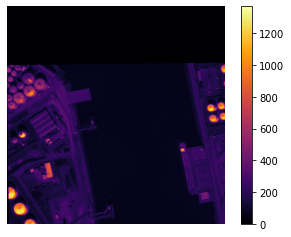

In [0]:
from matplotlib import pyplot as plt
fig = plt.imshow(red)
fig.set_cmap('inferno')
plt.colorbar()
plt.axis('off')
plt.show 

In [0]:
# plot just one band
def plot_band(band, cmap): 
  fig = plt.figure(figsize=(8, 8))
  fig.add_subplot(111)
  plt.imshow(band)
  plt.set_cmap(cmap)
  plt.show()

# mass plot all four bands
def plot_bands(red, green, blue, nir):
  fig = plt.figure(figsize=(16, 16))
  # fig.add_subplot(2,2,1) if into the double digits

  fig.add_subplot(221)
  plt.imshow(red)
  plt.set_cmap('inferno')
  plt.colorbar()
  plt.axis('off')
  plt.title('red')

  fig.add_subplot(222)
  plt.imshow(green)
  plt.set_cmap('gist_earth')
  plt.colorbar()
  plt.axis('off')
  plt.title('green')

  fig.add_subplot(223)
  plt.imshow(blue)
  plt.set_cmap('ocean')
  plt.colorbar()
  plt.axis('off')
  plt.title('blue')

  fig.add_subplot(224)
  plt.imshow(nir)
  plt.set_cmap('winter')
  plt.colorbar()
  plt.axis('off')
  plt.title('nir')

  plt.show()

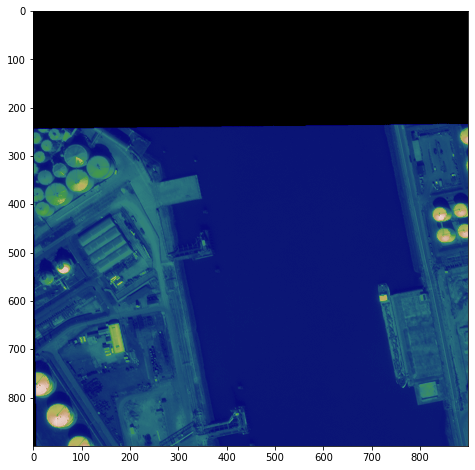

In [0]:
plot_band(green, 'gist_earth')

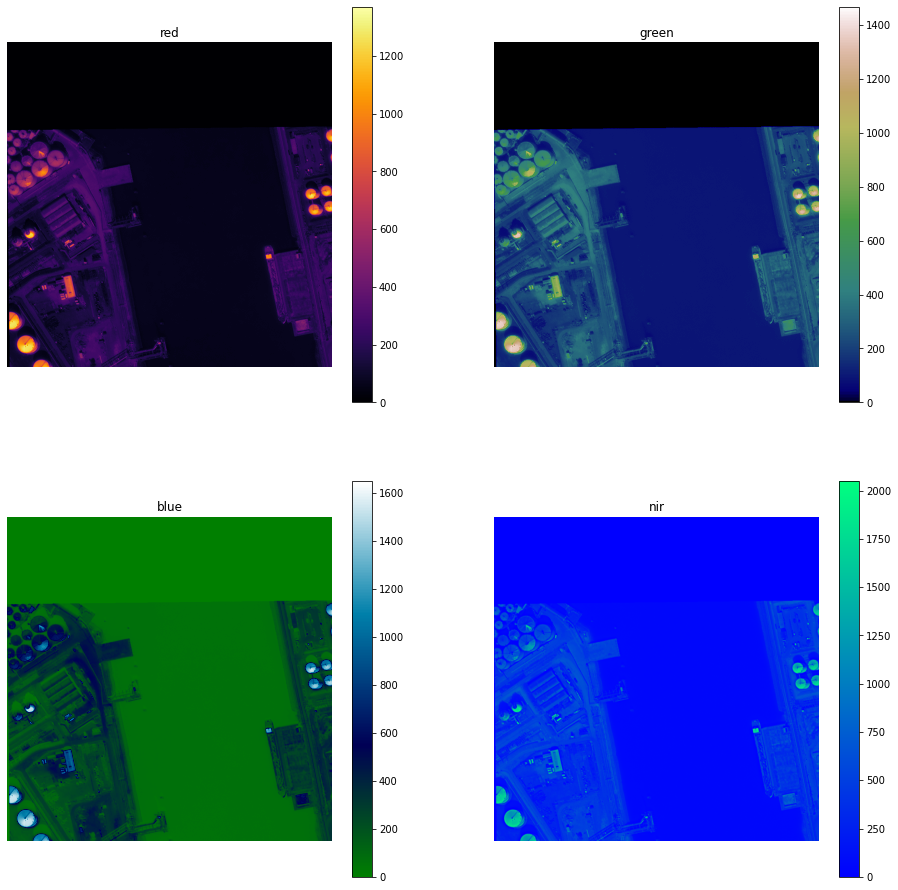

In [0]:
plot_bands(red, green, blue, nir)

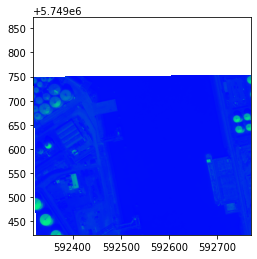

In [0]:
# this is actually just a shortcut to matplotlib plt functionality a
from rasterio.plot import show
show(satdat)

We still can open the other file formats of PAN, PS-RGB, RGBNIR, SAR Intensity, but we haven't done so yet

# Masking

The area of interest is a vector dataset, in geojson format. This is not raster, hence we use another library fiona to handle it

In [0]:
# using a mask to cut raster along boundary
! pip install fiona
import fiona

In [0]:
with fiona.open(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings_20190804111224_20190804111453_tile_8679.geojson') as f:
  aoi = [feature['geometry'] for feature in f] 

In [0]:
from rasterio.mask import mask

# crop=True crops the resulting raster to the AOI's bounding box
with rasterio.open(image_file) as img:
  clipped, transform = mask(img, aoi, crop=False)

print(clipped.shape)

(4, 900, 900)


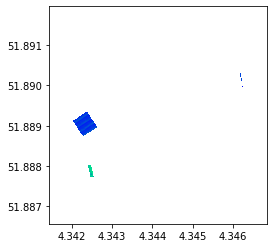

In [0]:
# use the metadata from the original image
meta = img.meta.copy()

# update metadata with new clipped boundary
meta.update({"transform": transform,
             "height": clipped.shape[1],
             "width": clipped.shape[2]
            })

# write the clipped-and-cropped data to a new geotiff
with rasterio.open(path_data/'clipped.tif', 'w', **meta) as dst:
  dst.write(clipped)

clipped_img = rasterio.open(path_data/'clipped.tif')
show(clipped_img)

In [0]:
# numpy.savetxt(path_data/'clipped.txt', (clipped[1]), fmt="%d")

# Reprojecting with rasterio 

In order to translate pixel coordinates in a raster dataset into coordinates that use a spatial reference system, an **affine transformation** must be applied to the dataset. This **transform** is a matrix used to translate rows and columsn of pixels into (x,y) spatial coordinate pairs. Every spatially referenced raster dataset has an **affine** **transform** that describes its pixel-to-map-coordinate transformation

In order to reproject a raster dataset from one coordinate reference system to another, rasterio uses the **transform** of the dataset. This can be calculated automatically using rasterio's `calculate_default_transform` method

In [0]:
from rasterio.warp import calculate_default_transform, reproject

# define our target CRS - rasterio will accept any CRS that can be defined using WKT
target_crs = "EPSG:4326"

In [0]:
transform, width, height = calculate_default_transform(clipped_img.crs, 
                                                       target_crs, 
                                                       clipped_img.width,
                                                       clipped_img.height,
                                                       *clipped_img.bounds)

Using a copy of the metadata from the clipped raster dataset and the transform we defined above, we can write a new geotiff containing the reprojected and clipped raster data

In [0]:
# Copy the metadata from the clipped dataset
metadata = clipped_img.meta.copy()

# change the CRS, transform, and dimensions in metadata to match our desired output dataset
metadata.update({'crs': target_crs,
                 'transform': transform,
                 'width': width,
                 'height': height})

In [0]:
# apply the transform and metadata to perform the reprojection 
# here we are saving the output to a new file name

with rasterio.open(path_data/'clipped_test.tif', 'w', **metadata) as reprojected:
  for band in range(1, clipped_img.count + 1):
    reproject(
        source = rasterio.band(clipped_img, band),
        destination = rasterio.band(reprojected, band),
        src_transform = clipped_img.transform, 
        src_crs = clipped_img.crs,
        dst_transform = transform,
        dst_crs = target_crs
    )

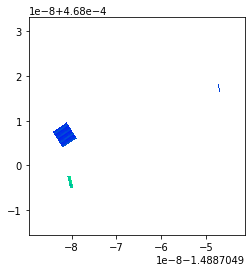

In [0]:
# take a look at our clipped and reprojected dataset
reproj = rasterio.open(path_data/'clipped_test.tif')
show(reproj)

In [0]:
reproj.shape

(903, 897)

# Try out with PAN data 

In [0]:
with open(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings_20190804111224_20190804111453_tile_8679.geojson') as f:
    data_geojson = json.load(f)
data_geojson

{'crs': {'properties': {'name': 'urn:ogc:def:crs:EPSG::32631'},
  'type': 'name'},
 'features': [{'geometry': {'coordinates': [[[592407.3276001553,
       5749547.382130783,
       0.0],
      [592413.6648108196, 5749518.051389321, 0.0],
      [592402.8587757543, 5749515.791177336, 0.0],
      [592396.2202141188, 5749545.007996829, 0.0],
      [592407.3276001553, 5749547.382130783, 0.0]]],
    'type': 'Polygon'},
   'properties': {'Building_ID': 25788,
    'origarea': 335.7778938362906,
    'origlen': 0,
    'partialDec': 1.0,
    'roof_075mean': 9.579999923706055,
    'roof_075median': 9.579999923706055,
    'roof_075stdev': 0.0,
    'truncated': 0},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[592436.7797718926, 5749570.257214302, 0.0],
      [592446.5121082863, 5749572.407167605, 0.0],
      [592447.3116037531, 5749568.772324787, 0.0],
      [592437.5895874575, 5749566.612707341, 0.0],
      [592436.7797718926, 5749570.257214302, 0.0]]],
    'type': 'Polygon'},
   'prope

In [0]:
! pip install rasterio
import rasterio

     |████████████████████████████████| 18.2MB 1.4MB/s 


In [0]:
image_file = path_data/'SN6_Train_AOI_11_Rotterdam_PAN_20190804111224_20190804111453_tile_8679.tif'
satdat = rasterio.open(image_file)
pan, = satdat.read()

<function matplotlib.pyplot.show>

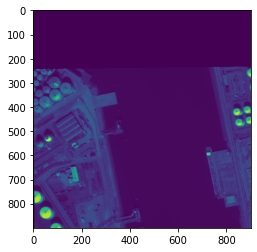

In [0]:
from matplotlib import pyplot as plt
fig = plt.imshow(pan)
# fig.set_cmap('inferno')
# plt.colorbar()
# plt.axis('off')
plt.show 

In [0]:
# using a mask to cut raster along boundary
! pip install fiona
import fiona

     |████████████████████████████████| 14.7MB 211kB/s 


In [0]:
with fiona.open(path_data/'SN6_Train_AOI_11_Rotterdam_Buildings_20190804111224_20190804111453_tile_8679.geojson') as f:
  aoi = [feature['geometry'] for feature in f] 

from rasterio.mask import mask

# crop=True crops the resulting raster to the AOI's bounding box
with rasterio.open(image_file) as img:
  clipped, transform = mask(img, aoi, crop=False)

print(clipped.shape)